In [1]:
import pymc as pm
import numpy as np
from astropy import units as u
from astropy import constants as c
import arviz as az
from astropy.table import Table
import matplotlib.pyplot as plt
from tqdm import tqdm

## Intializing the cosmology using astropy.cosmology
### This set of cosmological parameters match the cosmology used in the Dustgrain simulation:

In [2]:
from astropy.cosmology import FlatLambdaCDM

# Define the parameters
Omega_M = 0.31345
Omega_b = 0.0481
Omega_Lambda = 0.68655
h = 0.6731
sigma8 = 0.847

# Calculate Omega_CDM
Omega_CDM = Omega_M - Omega_b

# Define the cosmology
cosmo = FlatLambdaCDM(H0=h*100, Om0=Omega_M, Ob0=Omega_b)

### Importing the cluster and source catalogues:

In [3]:


cluster_cat = Table.read('./detected_clusters.cat', format='ascii')

sources = Table.read('./dustgrain_source_catalogue.fits', format='fits', memmap=True)



## Using the cluster catalogue and the source catalogue, the "shear_extraction" function will extract the 1D shear profile around each cluster, in a given radial range (bin_edges) and using sources at a given redshift behind the lens (dz).

In [5]:
# importing the wlclusters package
import wlclusters as wlcl

# create an array which will determine the edges of the radial binning in Mpc (proper distances)
# here we create 8 bin edges, i.e. 7 bin centers:
bin_edges = np.logspace(np.log10(0.3), np.log10(3.0), 8)  

# Extract shear profiles
shear_profiles = wlcl.shear_extraction(cluster_cat=cluster_cat, 
                                  sources=sources, 
                                  bin_edges=bin_edges,
                                  dz=0.1,
                                  cosmo = cosmo)

100%|█████████████████████████████████████████| 115/115 [00:27<00:00,  4.22it/s]


In [6]:
shear_profiles

ID,rin,rout,gplus,errors,msci,fl
int64,float64,float64,float64,float64,float64,float64
0,1.1059754549188876,1.5367479114970757,0.1306119405566662,0.027102582198775003,3.374320103626995e-16,1.0510716806380702
0,1.5367479114970757,2.1353042990125157,0.09986762970868862,0.01942589100181448,3.374320103626995e-16,1.0510716806380702
0,2.1353042990125157,2.966995702593482,0.11245214245593106,0.012563285347030075,3.374320103626995e-16,1.0510716806380702
0,2.966995702593482,4.122627160578104,0.05254860243486886,0.010218529338654051,3.374320103626995e-16,1.0510716806380702
0,4.122627160578104,5.728371864603598,0.055047711043114664,0.006762292162084089,3.374320103626995e-16,1.0510716806380702
...,...,...,...,...,...,...
380,3.74329290860386,5.2012886306239805,0.01373688971712785,0.007311648691957331,1.9291032815617473e-16,1.009791002223379
380,5.2012886306239805,7.227167117186248,0.000244783918841036,0.00535822812720862,1.9291032815617473e-16,1.009791002223379
380,7.227167117186248,10.04211614641199,0.005991049341775566,0.003869786190638102,1.9291032815617473e-16,1.009791002223379


## We can now run the MCMC, which will return two astropy tables, one containing the posteriors of each parameter (all_chains) and one containing a wrap up of the same information: median values, 16th and 84th percentiles (results).

In [7]:
all_chains, results = wlcl.run(cluster_cat=cluster_cat, 
                 shear_profiles=shear_profiles, 
                 cosmo=cosmo)

  0%|                                                   | 0/115 [00:00<?, ?it/s]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
  1%|▎                                          | 1/115 [00:24<46:43, 24.59s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
  2%|▋                                          | 2/115 [00:45<42:08, 22.37s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
  3%|█                                          | 3/115 [01:07<41:07, 22.03s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
  3%|█▍                                         | 4/115 [01:29<41:16, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
  4%|█▊                                         | 5/115 [01:51<40:45, 22.23s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
  5%|██▏                                        | 6/115 [02:13<40:03, 22.05s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
  6%|██▌                                        | 7/115 [02:35<39:42, 22.06s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 87 divergences after tuning. Increase `target_accept` or reparameterize.
  7%|██▉                                        | 8/115 [02:57<39:26, 22.12s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
  8%|███▎                                       | 9/115 [03:20<39:07, 22.14s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
  9%|███▋                                      | 10/115 [03:41<38:18, 21.89s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
 10%|████                                      | 11/115 [04:03<38:05, 21.97s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 10%|████▍                                     | 12/115 [04:25<37:51, 22.05s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 11%|████▋                                     | 13/115 [04:48<37:53, 22.29s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 12%|█████                                     | 14/115 [05:09<36:54, 21.92s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 13%|█████▍                                    | 15/115 [05:32<36:43, 22.04s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 14%|█████▊                                    | 16/115 [05:53<35:54, 21.76s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 15%|██████▏                                   | 17/115 [06:14<35:31, 21.75s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 16%|██████▌                                   | 18/115 [06:37<35:47, 22.14s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 17%|██████▉                                   | 19/115 [06:59<34:55, 21.82s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 17%|███████▎                                  | 20/115 [07:21<35:03, 22.15s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
 18%|███████▋                                  | 21/115 [07:43<34:32, 22.05s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 19%|████████                                  | 22/115 [08:05<34:14, 22.09s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 20%|████████▍                                 | 23/115 [08:27<33:47, 22.04s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 21%|████████▊                                 | 24/115 [08:49<33:19, 21.98s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 22%|█████████▏                                | 25/115 [09:11<32:58, 21.98s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
 23%|█████████▍                                | 26/115 [09:34<33:05, 22.30s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 23%|█████████▊                                | 27/115 [09:56<32:23, 22.09s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
 24%|██████████▏                               | 28/115 [10:19<32:21, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 25%|██████████▌                               | 29/115 [10:40<31:33, 22.02s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 26%|██████████▉                               | 30/115 [11:02<31:00, 21.89s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 27%|███████████▎                              | 31/115 [11:23<30:39, 21.90s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 28%|███████████▋                              | 32/115 [11:45<30:01, 21.71s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 29%|████████████                              | 33/115 [12:08<30:06, 22.03s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 30%|████████████▍                             | 34/115 [12:29<29:24, 21.79s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 30%|████████████▊                             | 35/115 [12:51<29:16, 21.95s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 31%|█████████████▏                            | 36/115 [13:12<28:35, 21.72s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 32%|█████████████▌                            | 37/115 [13:34<28:19, 21.79s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
 33%|█████████████▉                            | 38/115 [13:56<27:59, 21.82s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 34%|██████████████▏                           | 39/115 [14:18<27:46, 21.93s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 35%|██████████████▌                           | 40/115 [14:40<27:17, 21.84s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 36%|██████████████▉                           | 41/115 [15:02<26:56, 21.84s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 37%|███████████████▎                          | 42/115 [15:24<26:35, 21.86s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 37%|███████████████▋                          | 43/115 [15:47<26:50, 22.37s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 38%|████████████████                          | 44/115 [16:09<26:25, 22.33s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 39%|████████████████▍                         | 45/115 [16:32<26:17, 22.54s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 40%|████████████████▊                         | 46/115 [16:55<25:58, 22.59s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 41%|█████████████████▏                        | 47/115 [17:17<25:12, 22.25s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 42%|█████████████████▌                        | 48/115 [17:39<24:54, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
 43%|█████████████████▉                        | 49/115 [18:01<24:29, 22.27s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 123 divergences after tuning. Increase `target_accept` or reparameterize.
 43%|██████████████████▎                       | 50/115 [18:24<24:10, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 44%|██████████████████▋                       | 51/115 [18:45<23:34, 22.11s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 45%|██████████████████▉                       | 52/115 [19:07<23:12, 22.10s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 46%|███████████████████▎                      | 53/115 [19:29<22:50, 22.10s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 47%|███████████████████▋                      | 54/115 [19:52<22:32, 22.17s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 48%|████████████████████                      | 55/115 [20:14<22:12, 22.22s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 49%|████████████████████▍                     | 56/115 [20:36<21:35, 21.96s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 50%|████████████████████▊                     | 57/115 [20:57<21:12, 21.94s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
 50%|█████████████████████▏                    | 58/115 [21:20<20:55, 22.03s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 51%|█████████████████████▌                    | 59/115 [21:41<20:29, 21.96s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 52%|█████████████████████▉                    | 60/115 [22:04<20:12, 22.04s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
 53%|██████████████████████▎                   | 61/115 [22:25<19:42, 21.90s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 54%|██████████████████████▋                   | 62/115 [22:47<19:15, 21.81s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 55%|███████████████████████                   | 63/115 [23:08<18:46, 21.66s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 56%|███████████████████████▎                  | 64/115 [23:30<18:25, 21.68s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 57%|███████████████████████▋                  | 65/115 [23:52<18:04, 21.69s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 57%|████████████████████████                  | 66/115 [24:14<17:55, 21.95s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 58%|████████████████████████▍                 | 67/115 [24:35<17:22, 21.72s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
 59%|████████████████████████▊                 | 68/115 [24:57<17:04, 21.80s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
 60%|█████████████████████████▏                | 69/115 [25:19<16:37, 21.69s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 61%|█████████████████████████▌                | 70/115 [25:41<16:18, 21.75s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 62%|█████████████████████████▉                | 71/115 [26:03<16:09, 22.03s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 63%|██████████████████████████▎               | 72/115 [26:25<15:36, 21.77s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
 63%|██████████████████████████▋               | 73/115 [26:47<15:26, 22.05s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 64%|███████████████████████████               | 74/115 [27:10<15:07, 22.13s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 65%|███████████████████████████▍              | 75/115 [27:31<14:42, 22.06s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 66%|███████████████████████████▊              | 76/115 [27:54<14:23, 22.13s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 67%|████████████████████████████              | 77/115 [28:16<13:59, 22.10s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 68%|████████████████████████████▍             | 78/115 [28:38<13:40, 22.18s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 69%|████████████████████████████▊             | 79/115 [28:59<13:08, 21.90s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 70%|█████████████████████████████▏            | 80/115 [29:21<12:47, 21.94s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 70%|█████████████████████████████▌            | 81/115 [29:43<12:23, 21.87s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
 71%|█████████████████████████████▉            | 82/115 [30:06<12:08, 22.07s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 72%|██████████████████████████████▎           | 83/115 [30:27<11:40, 21.88s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 73%|██████████████████████████████▋           | 84/115 [30:49<11:16, 21.82s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
 74%|███████████████████████████████           | 85/115 [31:11<10:57, 21.93s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 75%|███████████████████████████████▍          | 86/115 [31:32<10:30, 21.74s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 76%|███████████████████████████████▊          | 87/115 [31:54<10:12, 21.86s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 77%|████████████████████████████████▏         | 88/115 [32:16<09:51, 21.92s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 77%|████████████████████████████████▌         | 89/115 [32:38<09:27, 21.83s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 78%|████████████████████████████████▊         | 90/115 [33:00<09:08, 21.95s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 79%|█████████████████████████████████▏        | 91/115 [33:22<08:42, 21.79s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 80%|█████████████████████████████████▌        | 92/115 [33:44<08:26, 22.00s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
 81%|█████████████████████████████████▉        | 93/115 [34:07<08:08, 22.18s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 82%|██████████████████████████████████▎       | 94/115 [34:29<07:48, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 83%|██████████████████████████████████▋       | 95/115 [34:52<07:26, 22.31s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 83%|███████████████████████████████████       | 96/115 [35:13<06:58, 22.02s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
 84%|███████████████████████████████████▍      | 97/115 [35:35<06:37, 22.10s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 85%|███████████████████████████████████▊      | 98/115 [35:58<06:17, 22.20s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
 86%|████████████████████████████████████▏     | 99/115 [36:19<05:51, 21.98s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 87%|███████████████████████████████████▋     | 100/115 [36:41<05:28, 21.91s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
 88%|████████████████████████████████████     | 101/115 [37:04<05:09, 22.11s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 89%|████████████████████████████████████▎    | 102/115 [37:26<04:47, 22.15s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
 90%|████████████████████████████████████▋    | 103/115 [37:48<04:25, 22.13s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
 90%|█████████████████████████████████████    | 104/115 [38:10<04:04, 22.20s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
 91%|█████████████████████████████████████▍   | 105/115 [38:33<03:43, 22.36s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 92%|█████████████████████████████████████▊   | 106/115 [38:55<03:19, 22.11s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
 93%|██████████████████████████████████████▏  | 107/115 [39:17<02:56, 22.10s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 94%|██████████████████████████████████████▌  | 108/115 [39:39<02:36, 22.29s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
 95%|██████████████████████████████████████▊  | 109/115 [40:01<02:13, 22.17s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
 96%|███████████████████████████████████████▏ | 110/115 [40:24<01:51, 22.28s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 97%|███████████████████████████████████████▌ | 111/115 [40:46<01:29, 22.29s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
 97%|███████████████████████████████████████▉ | 112/115 [41:07<01:05, 21.96s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
 98%|████████████████████████████████████████▎| 113/115 [41:30<00:44, 22.18s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
 99%|████████████████████████████████████████▋| 114/115 [41:53<00:22, 22.30s/it]Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cdelt, rdelt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
100%|█████████████████████████████████████████| 115/115 [42:14<00:00, 22.04s/it]


## In the case of the Dustgrain simulation, halo masses need to be corrected by the following factor:

In [8]:
def cat_correction(clust_cat):
    h0 = 1e-2 * cosmo.H0.to(u.km/(u.Mpc * u.s)).value
    return np.array((clust_cat['m200c'] * (h0)**2 * (1+clust_cat['z_p'])**3))

In [9]:
cluster_cat['m200c'] = cat_correction(cluster_cat)

## We may now compare the weak lensing masses we computed to the catalogue masses:

[]

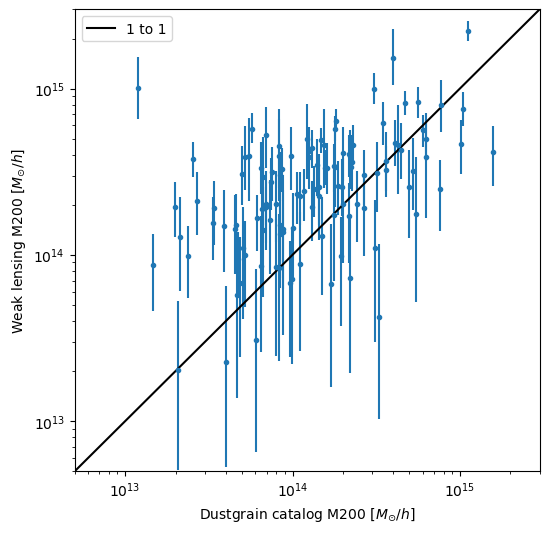

In [10]:
fig = plt.figure(figsize=(6, 6))



plt.errorbar(cluster_cat['m200c'], results['m200_med']/cosmo.h, 
             yerr=[(results['m200_med'] - results['m200_perc_16'])/cosmo.h, 
                   (results['m200_perc_84'] - results['m200_med'])/cosmo.h], 
             fmt='.',
            )


plt.plot([5e12, 3e15], [5e12, 3e15], color='black', label='1 to 1')


plt.xlim([5e12, 3e15])
plt.ylim([5e12, 3e15])

plt.xlabel('Dustgrain catalog M200 [$M_{\odot}/h$]')
plt.ylabel('Weak lensing M200 [$M_{\odot}/h$]')
plt.legend()

plt.loglog()

## Taking a look at the results on an individual cluster

### We can easily look at the results fby intializing the WLdata class for a given cluster (here lens_id = 0), the function "wldata_from_ID" is here for that, and can additionnally compute the shear, e.g. with median parameters : 

In [11]:
wldata, gplus_med, rm = wlcl.wldata_from_ID(lens_id = 0, 
                                            cluster_cat = cluster_cat, 
                                            shear_profiles = shear_profiles, 
                                            results = results, 
                                            return_shear=True,
                                            return_shear_model='median parameters', 
                                            cosmo=cosmo)

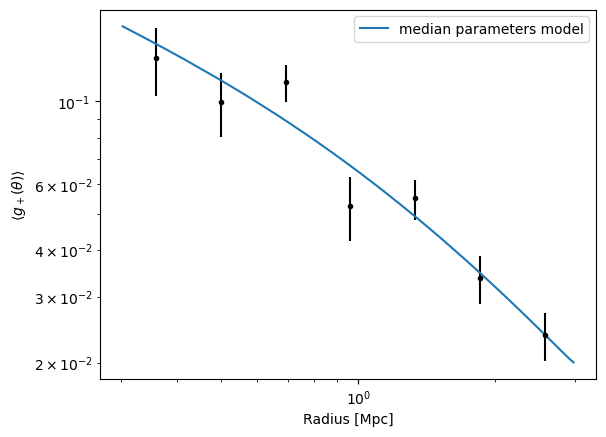

In [12]:
plt.errorbar(wldata.rref_wl, wldata.gplus, yerr = wldata.err_gplus, fmt='.', color='black')
plt.plot(rm, gplus_med, label='median parameters model')
plt.xlabel('Radius [Mpc]')
plt.ylabel(r'$\langle g_+(\theta) \rangle$')
plt.loglog()
plt.legend()

### We can also compute the posterior model for each drow of the MCMC, but depending on the number of samples (typically 4000), this can be a bit time consumming, for this reason, we pick a random subset of 500 elements.

In [13]:
wldata, gplus_enveloppe, rm = wlcl.wldata_from_ID(0, 
                   cluster_cat, 
                   shear_profiles, 
                   results, 
                   all_chains=all_chains,
                   return_shear=True,
                   return_shear_model='enveloppe', 
                   cosmo=cosmo)

100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 51.75it/s]


In [14]:
contours = np.percentile(gplus_enveloppe, [16, 84], axis=0)

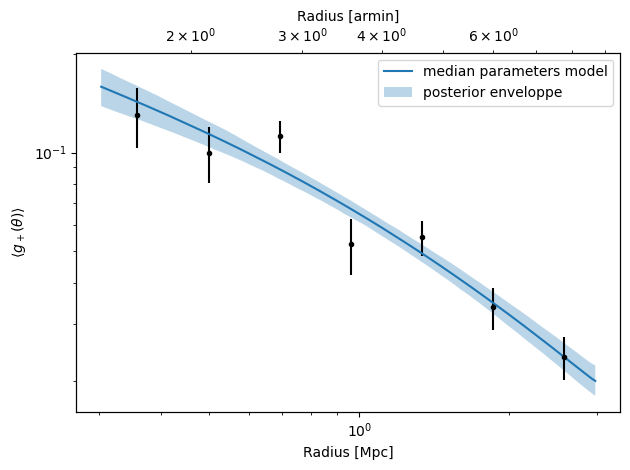

In [15]:
fig, ax = plt.subplots()

plt.errorbar(wldata.rref_wl, wldata.gplus, yerr = wldata.err_gplus, fmt='.', color='black')
plt.plot(rm, gplus_med, label='median parameters model')
plt.fill_between(rm, contours[0], contours[1], alpha=0.3, label='posterior enveloppe')
plt.xlabel('Radius [Mpc]')
plt.ylabel(r'$\langle g_+(\theta) \rangle$')
plt.loglog()
plt.legend()
# set arcmin axis
radii_arcmin = (wldata.rin_wl_am + wldata.rout_wl_am)/2
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Radius [armin]')
ax2.set_xlim(min(radii_arcmin), max(radii_arcmin))

plt.tight_layout()